In [4]:
import sys
sys.path.append('..')
import torch
import seaborn as sns
import pandas as pd

import lightning as pl
#from train import LightningModel, get_config_for_dataset
from bronze_age.config import LayerType

from bronze_age.datasets import DatasetEnum, get_dataset

dataset_enum = DatasetEnum.SIMPLE_SATURATION

In [ ]:
config = get_config_for_dataset(dataset_enum)
config.layer_type = LayerType.BronzeAgeGeneralConcept

In [ ]:
dataset = get_dataset(config)

In [3]:
model = LightningModel.load_from_checkpoint("lightning_logs_old/04/03/25 16:46 Simple_Saturation/version_0/checkpoints/epoch=1497-step=1498.ckpt")
#model = LightningModel.load_from_checkpoint("lightning_logs/04/03/25 19:55 Simple_Saturation/version_5/checkpoints/epoch=1499-step=1500.ckpt")

NameError: name 'LightningModel' is not defined

In [ ]:
x_in = dataset[0].x
s_in = x_in.argmax(dim=-1)
x_2 = model.model.input(x_in)
s_2 = x_2.argmax(dim=-1)

In [ ]:
# print confusion matrix of x_in, s_2
confusion_matrix = torch.zeros((x_in.shape[-1], x_2.shape[-1]))
for i in range(len(x_in)):
    confusion_matrix[s_in[i], s_2[i]] += 1

print(confusion_matrix)


tensor([[1980.,    0.,    0.],
        [   0.,    0.,   10.],
        [  10.,    0.,    0.]])


In [ ]:
x_3 = model.model.stone_age[0](x_2, edge_index=dataset[0].edge_index)
s_3 = x_3.argmax(dim=-1)

In [ ]:
confusion_matrix = torch.zeros((x_2.shape[-1], x_3.shape[-1]))
for i in range(len(x_in)):
    confusion_matrix[s_2[i], s_3[i]] += 1

print(confusion_matrix)

tensor([[   0.,    0., 1990.],
        [   0.,    0.,    0.],
        [   0.,    0.,   10.]])


In [ ]:
x_4 = model.model.output(x_3)
s_4 = x_4.argmax(dim=-1)

confusion_matrix = torch.zeros((x_3.shape[-1], x_4.shape[-1]))
for i in range(len(x_in)):
    confusion_matrix[s_3[i], s_4[i]] += 1

print(confusion_matrix)

tensor([[   0.,    0.],
        [   0.,    0.],
        [ 604., 1396.]])


In [ ]:
x_3

tensor([[5.7936e-05, 1.0204e-04, 9.7372e-01],
        [5.7817e-05, 1.0192e-04, 9.7372e-01],
        [5.8651e-05, 1.0288e-04, 9.7372e-01],
        ...,
        [8.8458e-06, 2.6639e-06, 9.8924e-01],
        [8.8160e-06, 2.6536e-06, 9.9232e-01],
        [8.8372e-06, 2.6610e-06, 9.9005e-01]], grad_fn=<SqueezeBackward1>)

In [ ]:
x_3.reshape(-1)[:5]

tensor([5.7936e-05, 1.0204e-04, 9.7372e-01, 5.7817e-05, 1.0192e-04],
       grad_fn=<SliceBackward0>)

/Users/jos/cambridge/lent2024/bronze-age/.env/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


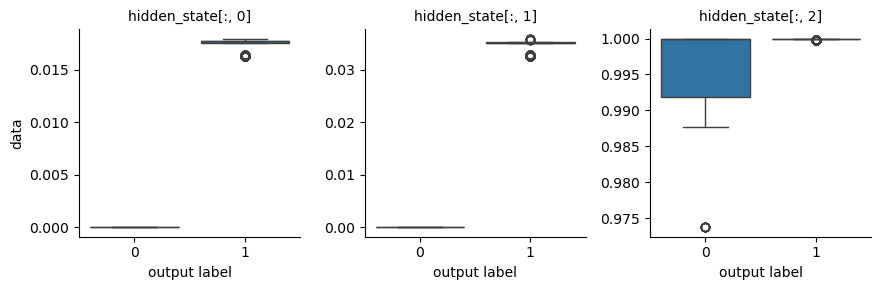

In [ ]:

data = x_3.reshape(-1).detach().numpy()
state = torch.arange(x_3.shape[1]).repeat(x_3.shape[0]).detach().numpy()
s4_repeat = torch.repeat_interleave(s_4, x_3.shape[1]).detach().numpy()
data = pd.DataFrame({'data': data, 'state': state, 's_4': s4_repeat})
grid = sns.FacetGrid(data, col='state', sharey=False).map(sns.boxplot, 's_4', 'data')

for ax in grid.axes.flatten():
    ax.set_xlabel(f'output label')

grid.set_titles(col_template='hidden_state[:, {col_name}]')

In [ ]:
state

array([0, 1, 2, ..., 0, 1, 2])

In [ ]:
s_4.shape

torch.Size([2000])

<Axes: xlabel='None', ylabel='None'>

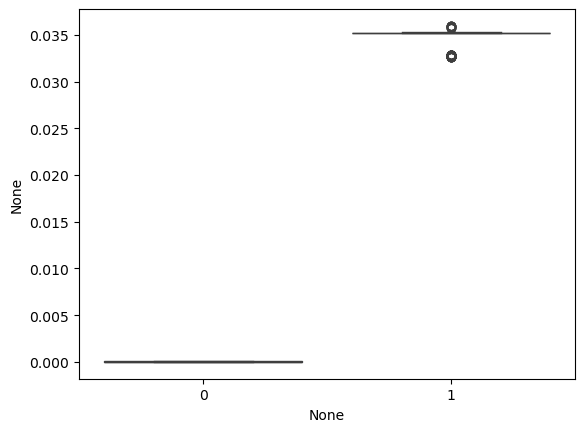

In [ ]:
sns.boxplot(x=s_4.detach(), y=x_3.detach()[:, 1])

<Axes: xlabel='None', ylabel='None'>

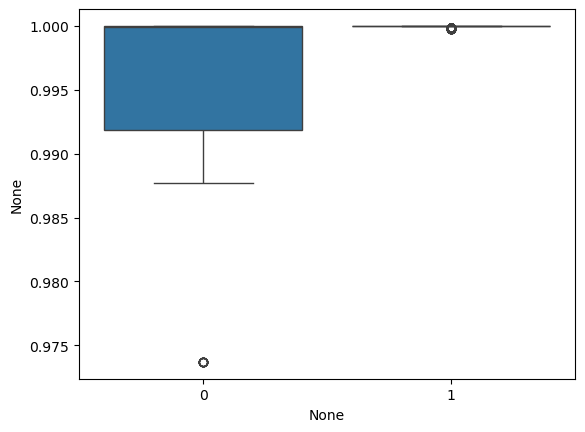

In [ ]:
sns.boxplot(x=s_4.detach(), y=x_3.detach()[:, 2])